# Homework #6
Due 10/30

## Problem 1. Camera Calibration

1) Using the checkerboard calibration method shown in class, collect a set of images and calibrate a camera.

Here is a site that allows you to print some high quality boards
https://markhedleyjones.com/projects/calibration-checkerboard-collection

2) After you have you calibration file, use the functions
cv2.getOptimalNewCameraMatrix, cv2.initUndistortRectifyMap, and cv2.remap
to undistort an image taken with the same camera.  

找到角点: True, 图片路径: 1.jpg


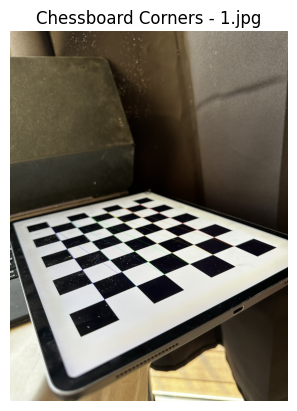

找到角点: False, 图片路径: 2.jpg
找到角点: True, 图片路径: 3.jpg


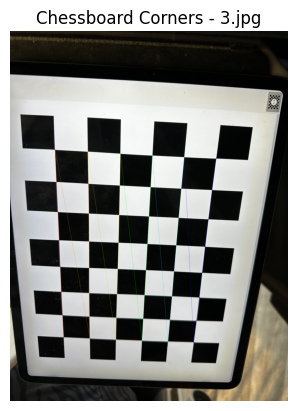

找到角点: True, 图片路径: 4.jpg


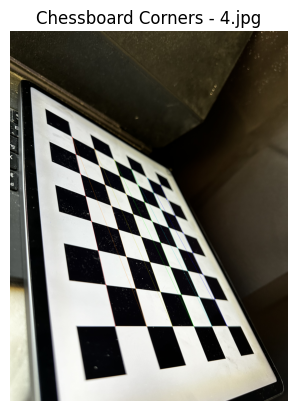

找到角点: True, 图片路径: 5.jpg


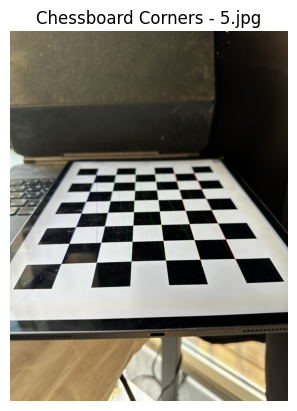

找到角点: True, 图片路径: 6.jpg


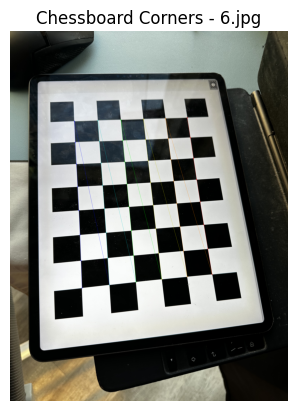

相机校准成功！


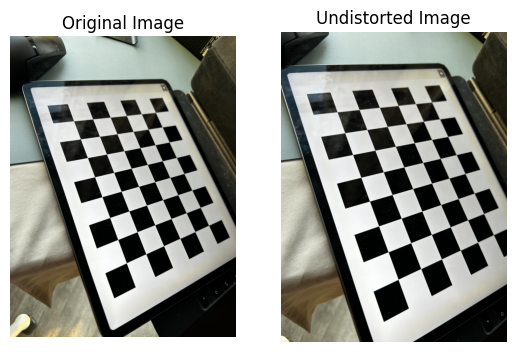

In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt


checkerboard_size = (8, 6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


obj_points = [] 
img_points = []  

real_coors = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
real_coors[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)


images = glob.glob('*.jpg')  

for image_path in images:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Step 1: Find the checkerboard corner points
    retval, corners = cv2.findChessboardCorners(image=gray, patternSize=checkerboard_size)
    

    if retval:

        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        cv2.drawChessboardCorners(img, checkerboard_size, corners, retval)


        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Chessboard Corners - {image_path}")
        plt.axis('off') 
        plt.show()

 
        img_points.append(corners)
        obj_points.append(real_coors)


if len(obj_points) > 0 and len(img_points) > 0:
    ret, cameramtx, distcorr, rot, trans = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

    img = cv2.imread('1/7.jpg')  
    h, w = img.shape[:2]


    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(cameramtx, distcorr, (w, h), 1, (w, h))

    # undistort 
    dst = cv2.undistort(img, cameramtx, distcorr, None, newcameramtx)


    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]

       
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

 
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.title('Undistorted Image')
    plt.axis('off')

    plt.show()



## Problem 2.  3D Computer Graphics

Computer graphics is interested in the process of mapping 3D objects into 2D images.  

1) Using an array containing the 8 corners on a cube, write a function to map these points into a 2D image given the set of three Euler angles and the translation vector describing the transform from the camera origin to the world coordinates of the cube.  In other words, calculate what an image of the corners of the cube would look like if photographed from a particular camera position

2) Use the camera matrix from part 1 to project the corner points into the image frame 

3) Show a scatter plot (2D) of the projected 2D positions of the cube for two or more sets of Euler angles.  (use the equations from part 2)


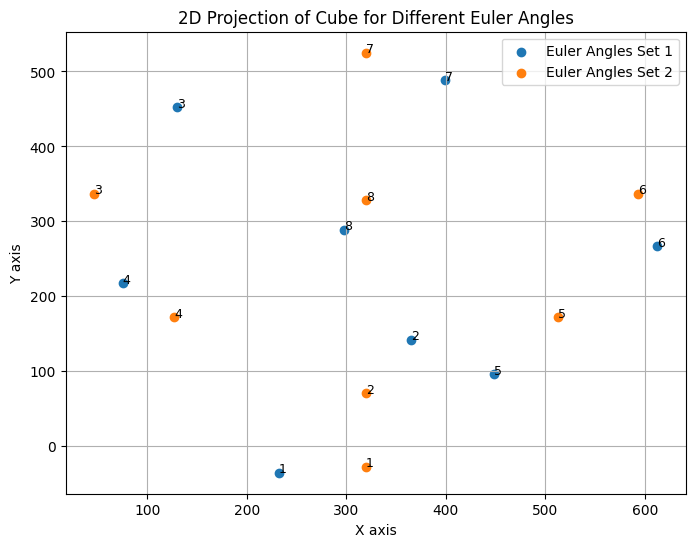

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def get_cube_points(size=1.0):
    return np.array([
        [-size, -size, -size],
        [ size, -size, -size],
        [ size,  size, -size],
        [-size,  size, -size],
        [-size, -size,  size],
        [ size, -size,  size],
        [ size,  size,  size],
        [-size,  size,  size]
    ])


def euler_angles_to_rotation_matrix(theta):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta[0]), -np.sin(theta[0])],
        [0, np.sin(theta[0]), np.cos(theta[0])]
    ])

    R_y = np.array([
        [np.cos(theta[1]), 0, np.sin(theta[1])],
        [0, 1, 0],
        [-np.sin(theta[1]), 0, np.cos(theta[1])]
    ])

    R_z = np.array([
        [np.cos(theta[2]), -np.sin(theta[2]), 0],
        [np.sin(theta[2]), np.cos(theta[2]), 0],
        [0, 0, 1]
    ])

    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

def project_3d_to_2d(points, camera_matrix, rotation_matrix, translation_vector):
    points_rotated = (rotation_matrix @ points.T).T + translation_vector
    points_2d = (camera_matrix @ points_rotated.T).T
    points_2d = points_2d[:, :2] / points_2d[:, 2][:, np.newaxis]  # 归一化
    return points_2d


camera_matrix = np.array([
    [800, 0, 320],
    [0, 800, 240],
    [0, 0, 1]
])


cube_points = get_cube_points()
# Set different Euler angles and translation vectors
euler_angles_set = [
    (np.radians(30), np.radians(45), np.radians(60)),
    (np.radians(45), np.radians(60), np.radians(90))
]
translation_vector = np.array([0, 0, 5])  

# Draw 2D projections corresponding to different Euler angles
plt.figure(figsize=(8, 6))
for i, euler_angles in enumerate(euler_angles_set):
    rotation_matrix = euler_angles_to_rotation_matrix(euler_angles)
    projected_2d_points = project_3d_to_2d(cube_points, camera_matrix, rotation_matrix, translation_vector)
    
    plt.scatter(projected_2d_points[:, 0], projected_2d_points[:, 1], label=f'Euler Angles Set {i+1}')
    for j, point in enumerate(projected_2d_points):
        plt.text(point[0], point[1], f'{j+1}', fontsize=9)

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("2D Projection of Cube for Different Euler Angles")
plt.legend()
plt.grid()
plt.show()


## Problem 3. 3D Computer Vision 

Problem 2 is the forward model (going from 3D to 2D to make an image), in this problem we will do the inverse model going from 2D back to 3D.

1) Using your code from Problem 2, create an array of 5 (or more) points in the image space for a rotating cube (along one of the Euler angles) trajectory (e.g. at theta = {0,60,120,180,240}) 

2) Using the Tomasi-Kanade factorization approach, compute the Rotation (rho) and structure (X) matrices using data from part 1


Rotation Matrix (Rho):
 [[-17.23530126  -2.7172449   -6.5965979 ]
 [ -0.22186669  -1.2633696  -12.48530982]
 [ -9.00876244  -8.52547937  -0.41624602]
 [  3.46724514   1.06146742 -12.48709406]
 [ -2.94287403  -9.90986019   3.56948041]
 [  8.47518052  -2.59537358  -8.05023904]
 [ -4.85267288  -6.65828126   1.48288494]
 [ 10.84067991  -9.34134404  -2.6842817 ]
 [-10.38896386  -3.17935785  -2.44461192]
 [  6.21893495 -15.89317234   2.04403133]]
Structure Matrix (X):
 [[  7.50910152   4.38107232 -13.2989583   16.59484666 -15.18606221]
 [ 18.05854105   2.88457178  -0.56061811 -14.63854942  -5.74394529]
 [ -5.8438486   16.47767223  -9.83945434  -5.38768908   4.59331979]]


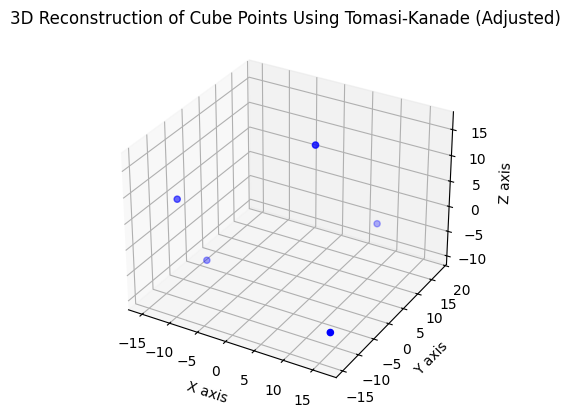

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_cube_points(size=1.0):
    return np.array([
        [-size, -size, -size],
        [ size, -size, -size],
        [ size,  size, -size],
        [-size,  size, -size],
        [ size,  size,  size]
    ])

def euler_angles_to_rotation_matrix(theta):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta[0]), -np.sin(theta[0])],
        [0, np.sin(theta[0]), np.cos(theta[0])]
    ])

    R_y = np.array([
        [np.cos(theta[1]), 0, np.sin(theta[1])],
        [0, 1, 0],
        [-np.sin(theta[1]), 0, np.cos(theta[1])]
    ])

    R_z = np.array([
        [np.cos(theta[2]), -np.sin(theta[2]), 0],
        [np.sin(theta[2]), np.cos(theta[2]), 0],
        [0, 0, 1]
    ])

    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

def project_3d_to_2d(points, camera_matrix, rotation_matrix, translation_vector):
    points_rotated = (rotation_matrix @ points.T).T + translation_vector
    points_2d = (camera_matrix @ points_rotated.T).T
    points_2d = points_2d[:, :2] / points_2d[:, 2][:, np.newaxis]  # normalize
    return points_2d

camera_matrix = np.array([
    [800, 0, 320],
    [0, 800, 240],
    [0, 0, 1]
])

cube_points = get_cube_points()

angles = [np.radians(angle) for angle in [0, 60, 120, 180, 240]]
euler_angle = (np.radians(30), 0, 0) 
translation_vector = np.array([0, 0, 5])

projected_points = []

for angle in angles:
    rotation_matrix = euler_angles_to_rotation_matrix((angle, euler_angle[1], euler_angle[2]))
    projected_2d_points = project_3d_to_2d(cube_points, camera_matrix, rotation_matrix, translation_vector)
    projected_points.append(projected_2d_points)

projected_points = np.array(projected_points).reshape(len(angles)*2, -1)

mean = np.mean(projected_points, axis=1, keepdims=True)
projected_points_centered = projected_points - mean

# Tomasi-Kanade
U, S, Vt = np.linalg.svd(projected_points_centered, full_matrices=False)
S_sqrt = np.diag(np.sqrt(S[:3]))  
Rho = U[:, :3] @ S_sqrt         
X = S_sqrt @ Vt[:3, :]           

#Adjust the scale of the 3D structure matrix to center it
X -= X.mean(axis=1, keepdims=True)

print("Rotation Matrix (Rho):\n", Rho)
print("Structure Matrix (X):\n", X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0, :], X[1, :], X[2, :], c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title("3D Reconstruction of Cube Points Using Tomasi-Kanade (Adjusted)")
plt.show()


## Problem 4.  Essential Matrix

1) Using the code from problem 2 (with no camera distortion applied), generate two sets of 2D image points. (or use two of the sets from problem 3)

2) Compute the essential matrix from the two sets of corresponding points.  
Use the code cv.findEssentialMat.  Since you already know the matches, you can skip any other registration/feature matching steps.




In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_cube_points(size=1.0):
    return np.array([
        [-size, -size, -size],
        [ size, -size, -size],
        [ size,  size, -size],
        [-size,  size, -size],
        [-size, -size,  size],
        [ size, -size,  size],
        [ size,  size,  size],
        [-size,  size,  size]
    ])

def euler_angles_to_rotation_matrix(theta):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta[0]), -np.sin(theta[0])],
        [0, np.sin(theta[0]), np.cos(theta[0])]
    ])
    R_y = np.array([
        [np.cos(theta[1]), 0, np.sin(theta[1])],
        [0, 1, 0],
        [-np.sin(theta[1]), 0, np.cos(theta[1])]
    ])
    R_z = np.array([
        [np.cos(theta[2]), -np.sin(theta[2]), 0],
        [np.sin(theta[2]), np.cos(theta[2]), 0],
        [0, 0, 1]
    ])
    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

def project_3d_to_2d(points, camera_matrix, rotation_matrix, translation_vector):
    points_rotated = (rotation_matrix @ points.T).T + translation_vector
    points_2d = (camera_matrix @ points_rotated.T).T
    points_2d = points_2d[:, :2] / points_2d[:, 2][:, np.newaxis]  # 归一化
    return points_2d


camera_matrix = np.array([
    [800, 0, 320],
    [0, 800, 240],
    [0, 0, 1]
])

cube_points = get_cube_points()
angles1 = (np.radians(0), np.radians(30), np.radians(0))
angles2 = (np.radians(0), np.radians(60), np.radians(0))
translation_vector = np.array([0, 0, 5])


rotation_matrix1 = euler_angles_to_rotation_matrix(angles1)
points_2d_1 = project_3d_to_2d(cube_points, camera_matrix, rotation_matrix1, translation_vector)


rotation_matrix2 = euler_angles_to_rotation_matrix(angles2)
points_2d_2 = project_3d_to_2d(cube_points, camera_matrix, rotation_matrix2, translation_vector)

points_2d_1 = points_2d_1.astype(np.float32)
points_2d_2 = points_2d_2.astype(np.float32)

#  cv2.findEssentialMat 
essential_matrix, mask = cv2.findEssentialMat(points_2d_1, points_2d_2, camera_matrix, method=cv2.RANSAC, prob=0.999, threshold=1.0)

if essential_matrix.shape == (3, 3):
    print("Essential Matrix:\n", essential_matrix)
else:
    print("First Essential Matrix:\n", essential_matrix[:3, :3])  


Essential Matrix:
 [[ 2.52206861e-09  1.83012622e-01 -2.38800515e-08]
 [ 1.83012622e-01 -1.93388591e-09 -6.83012723e-01]
 [-1.46251624e-08  6.83012723e-01  5.88182328e-10]]


## Problem 5. [ECE2390 students].  Epipolar lines

1) Using the same camera you calibrated in problem 1, take two images of the same object.  I suggest using something that has strong features.

2) Using SIFT features (cv2.SIFT_create() & sift.detectAndCompute) find matching features in the image.  You can use the cv2.FlannBasedMatcher() or the cv2.BFMatcher().

3) Compute the fundemental matrix between the two images

4) Using the function cv2.computeCorrespondEpilines, compute the epipolar lines for your points from one image, and draw them onto the second image


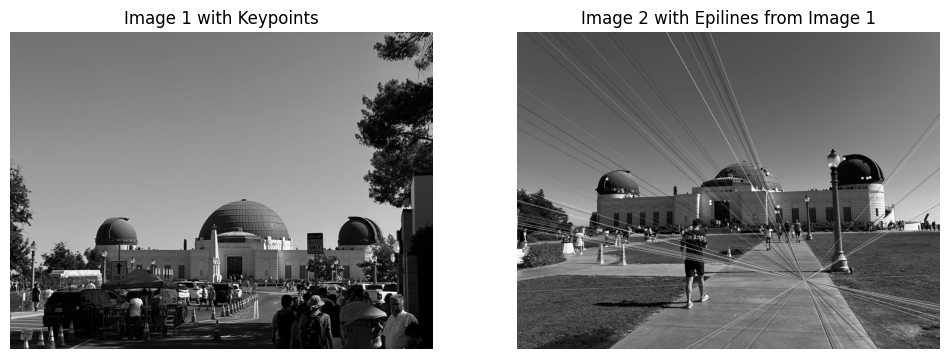

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('i3.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('i4.jpg', cv2.IMREAD_GRAYSCALE)

# SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

#  BFMatcher 
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

fundamental_matrix, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

points1 = points1[mask.ravel() == 1]
points2 = points2[mask.ravel() == 1]

lines1 = cv2.computeCorrespondEpilines(points2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)

def draw_epilines(img, lines, points):
    img_with_lines = img.copy()
    for r, pt in zip(lines, points):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [img.shape[1], -(r[2] + r[0] * img.shape[1]) / r[1]])
        img_with_lines = cv2.line(img_with_lines, (x0, y0), (x1, y1), color, 1)
        img_with_lines = cv2.circle(img_with_lines, tuple(map(int, pt)), 5, color, -1)

    return img_with_lines

# 在图像2上绘制来自图像1的极线
img2_with_lines = draw_epilines(img2, lines1, points2.reshape(-1, 2))

# 显示结果
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Keypoints'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Epilines from Image 1'), plt.axis('off')
plt.show()
